<center>
    <h1> El Niño - Southern Oscilation (ENSO) from monthly Sea Surface Temperature anamolies </h1>
    <h2 style="text-weight: bold">COURSE: Scientific Computing </h2>
    <h3 style="text-weight: bold">PRESENTED TO: Dr. Pierre Augier </h3>
    <h4> Done by: </h4>
    <h4 style="text-weight: bold"> Magaly Cusipuma </h4>

</center>

__________

### 1.- INTRODUCTION

> The El Niño-Southern Oscillation (ENSO) phenomena, the strongest climatic fluctuation on time scales ranging from a few months to several years, is characterized by interannual variations of the tropical Pacific sea surface temperatures (SST), producing warm (El Niño) and cold (La Niña) episodes. As ENSO affects not only the tropical climate but also the extratropical climate. 

> Since the early 1980s, much effort has been devoted to forecasting the tropical Pacific SST anomalies. ENSO forecast models can be categorized into three types: dynamical models, statistical models, and hybrid (statistical-dynamical) models.

> The present study is aimed at studying the Principal Component Analysis (PCA) to extract essential information from voluminous data sets. Moreover, to understand the relationship between the principal component and the Empirical Orthogonal Functions (EOF)

<img alt="weather" src="figures/ENSO-normal.png" width=400 style="float:left">
<img alt="weather" src="figures/ENSO-El_Nino.png" width=400 style="float:right">

### 2.- DATA


- Input:
  - [Sea Surface Temperature](https://psl.noaa.gov/data/gridded/data.noaa.oisst.v2.highres.html) at latitud 40°S–40°N
    - Domain: Central Equatorial Pacific 
    - Time resolution: Monthly Mean SST
    - Period: 1981-2021
    - Units: Celsius
    - Source: [NOAA Optimum Interpolation (OI)](https://psl.noaa.gov/data/gridded/data.noaa.oisst.v2.highres.html)
  
- Target:
  - Sea Surface Temperature
    - Domain: Equatorial zone
    - Time resolution: monthly
    - Units:Celsius
    - Spatial resolution: 1 degree$\times$1 degree
  

### 3.- PRINCIPAL COMPONENT ANALISYS (PCA)

> PCA is the method which analyzes the variability of Sea Surface Temperature (SST). Commonly, it is used for two objectives: Reducing the number of variables comprising a dataset while retaining the variability in the data and identifying hidden patterns in the data

> The PCA method defines a specific orthogonal coordinate system for each data set of data such that the center of this corodinate system is at the centroid of the data.

>The matrix is organized in the form of nxp matrix, where these are the values of the SST at time t and location x. Below mention the steps to following to calculate the principal components

> ### 3.1 Mean subtraction
Calculate the mean of the variable 
> ### 3.2 Estimate covariance matrix
The matrix $Z_{nxp}$ is use to calculate the covariance matrix C by $ C_{nxn} = Z^{T}_{pxn}$
> ### 3.3 Compute eigenvalues and eigenvectors
The linear transformation of the data that maximizes the variances is found by solving the eigensystem where lambda are the eigenvalues $(C-\lambda I)A = 0$.
> ###  3.4 Empirical Orthogonal Functions (EOFs) 
The solution of the eigensystem is a set of k normalized eigenvectors or empirical orthogonal functions (EOFs) and $A_{nxk}$  principal components(PC) $Y_{pxk} =Z^{T}_{pxn}Z_{pxn}$. Each PC has P elements that can be mapped in space, and each EOF has n elements that can be plotted in time

In [1]:
# Import libraries
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt # plotting tool
import xarray as xr
import cartopy.crs as ccrs # for map projections
from IPython.core.display import display, HTML
# Data directory
DATA_DIR = Path('C:\\Users\\User\\Downloads\\1.-MASTER_EFM\\TP')

# Filename sea surface temperatura from NOAA Optimum Interpolation (OI)
filename = 'p.nc'

filepath = Path(DATA_DIR, filename)
ds = xr.load_dataset(filepath)

> The data to analyze is xarray where the components are latitude, longitude and time. The size is (lat: 80, log:120, time:475). The period to analyse is 40 years and the variable to study is Sea Surface Temperature (SST).

> After that, calculating the mean, desviation standar and the varianza of the SST along the time and then plot the variablility of specific years.

In [2]:
# Select the variable to analyses
da = ds['sst']


### 3.1 Mean subtraction

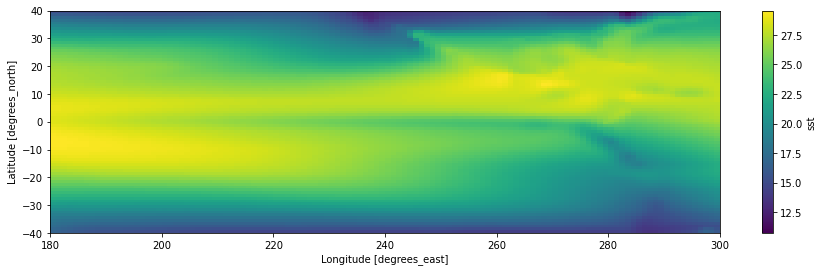

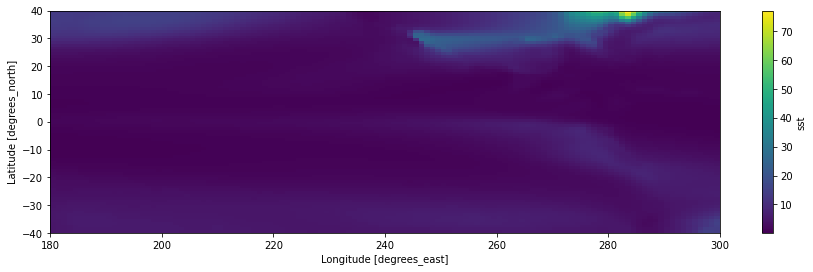

In [3]:
da_mean = da.mean('time') # Compute the mean
da_dev = da - da_mean # Compute deviations from the mean
da_var = da_dev.var('time') # Compute the variance
# Plot mean and the variance
plt.figure(figsize=[15, 9])
plt.subplot(2,1,1)
da_mean.plot()
plt.figure(figsize=[15, 9])
plt.subplot(2,1,2)
da_var.plot()


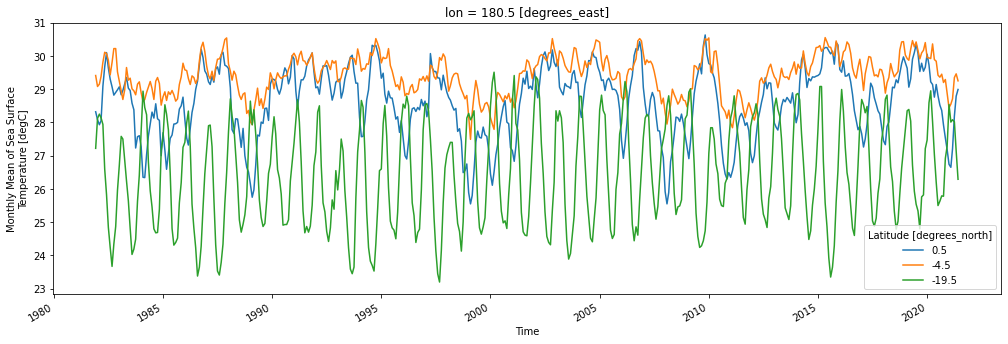

In [4]:
da.sel(lat=[-0,-5,-20],lon=-80,method='nearest').plot(hue='lat',figsize=(17,5))

> The graphs below show the variation of SST at different latitudes (0, -5 and -20) in the years that El Niño occurred according to NOAA's Oceanic Niño Index (ONI). Considering the El Niño of extraordinary intensity in (1997), normal conditions in (1993) and moderate-intensity in (2017).

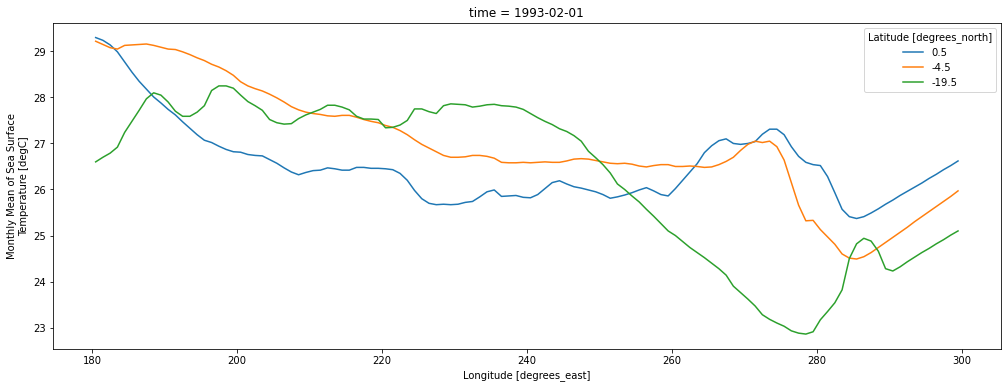

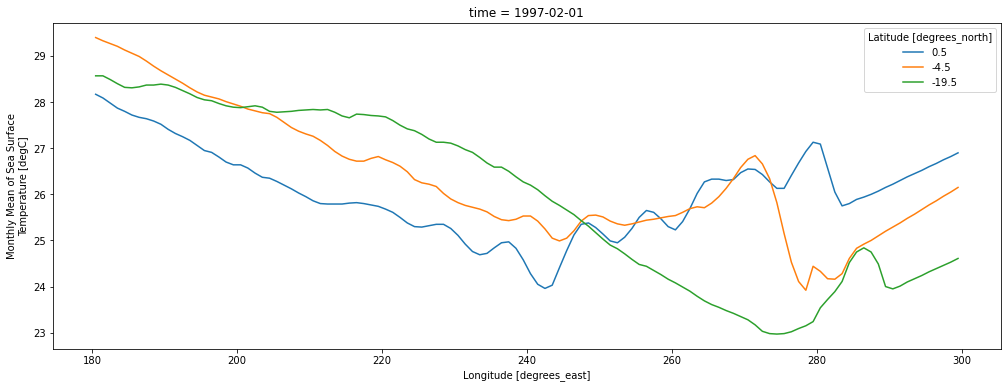

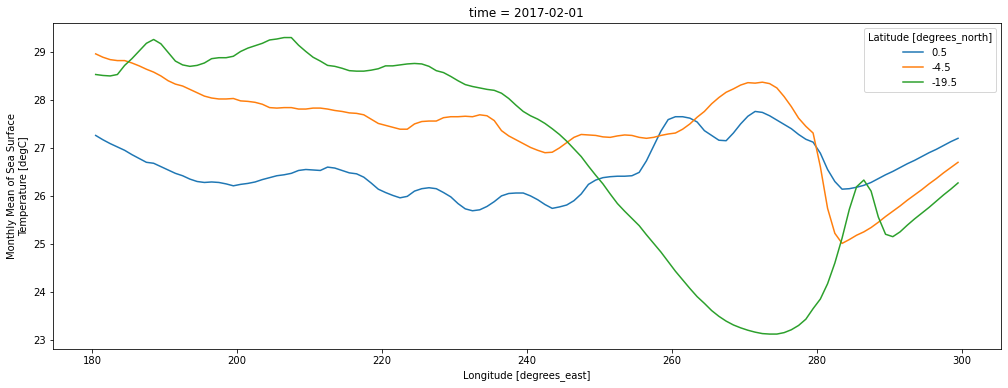

In [5]:
da.sel(lat=[0, -5, -20], time="1993-02", method="nearest").plot( x="lon", hue="lat", figsize=(17, 6))
#da.sel(lat=[0, -5, -20], time="1998-02", method="nearest").plot( x="lon", hue="lat", figsize=(17, 6))
da.sel(lat=[0, -5, -20], time="1997-02", method="nearest").plot( x="lon", hue="lat", figsize=(17, 6))
#da.sel(lat=[0, -5, -20], time="2004-02", method="nearest").plot(x="lon", hue="lat", figsize=(17, 6))
da.sel(lat=[0, -5, -20], time="2017-02", method="nearest").plot(x="lon", hue="lat", figsize=(17, 6))

In [6]:
#da.sel(time="1993-02", lat=[0, -5, -20], method="nearest").plot.contourf( x="lon", hue="lat", figsize=(17, 6));

#da.isel(time=10).sel(lon=slice(-160, -60), lat=slice(-30, 30)).plot(robust=True, figsize=(8, 6));

> Calculated the area coefficient for every grid point and compute the multiplication of the deviations with the coefficient at every point and then plot the variance a long the time.

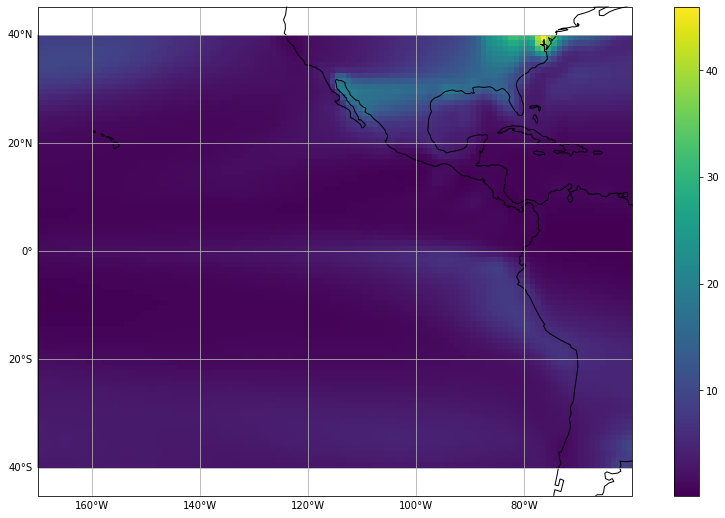

In [7]:
# Get grid-point area coefficients
coef = np.cos(np.deg2rad(da['lat']))
da_scaled = da_dev * coef

# Plot scaled variance at every grid point
fig = plt.figure(figsize=[15, 9])
ax = plt.subplot(projection=ccrs.PlateCarree())
p = da_scaled.var('time').plot(ax=ax)
ax.set_extent([-170,-60,-30,30])
ax.coastlines()
gl=ax.gridlines(draw_labels=True)
gl.top_labels=False
gl.right_labels=False

###  3.3 Estimate covariance matrix

> To calculate how the variables of the input data set are varying from the mean with respect to each other, or in other words, to see if there is any relationship between them. The covariance matrix is an nxp symmetric matrix that has as entries the covariances associated with all possible pairs of the initial variables.

> To calculate the PCA is necessary to estimate the covariance matrix of the scaled sea surface temperature using the stack method of data arrays for every latitude and longitude

In [8]:
da_scaled_2d = da_scaled.stack(latlon=['lat', 'lon'])
X = da_scaled_2d.values

Sigma_cov = np.cov(X.T) #Covariance matrix

In [9]:
Sigma_cov.shape #shape of the covariance matrix

(9600, 9600)

### 3.4 Compute eigenvalues and eigenvectors

> Compute the eigenvectors and eigenvalues from the covariance matrix in order to determine the principal components of the data.

> To calculate the eigenvalues and eigenvectors of a conjugate symmetric matrix using the command linalg.eigh of NumPy library from the covariance matrix with the shape (9600x9600)

In [10]:
#lam eigenvalues
#V eigenvectors
lam, V = np.linalg.eigh(Sigma_cov)

> The eigenvalues and eigenvectors are sorted in descending. In order to select the maximum possible information in the first component, then maximum remaining information in the second and so on, until having something to reproduce the data.

> Sort the EOFs and corresponding variances by decreasing variances. Moreover, 50 EOFs explain the fraction of the variance important to describe the physics of the variable 


([<matplotlib.axis.XTick at 0x2311fa59880>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

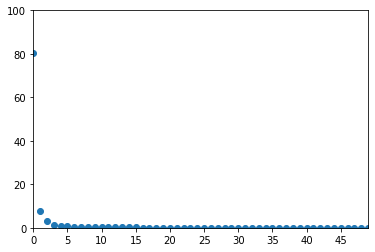

In [11]:
# Sort eigenvalues and eigenvectors by decreasing eigenvalues
isort = np.argsort(-lam)
lam = lam[isort]
V = V[:, isort]

# Convert eigenvalues to explained variance percentage
expvar = lam / lam.sum() * 100

# Plot first 50 explained variances
n_eig = 50
xlim = [0., n_eig - 1]
x = np.arange(len(expvar[:n_eig]))
plt.figure()
plt.scatter(x, expvar[:n_eig])
plt.xlim(xlim)
plt.ylim(0., 100.)
plt.xticks(range(0, n_eig, 5))

> Used unstack to calculate for every longitude and latitude and then plot the using the projection coordinate.

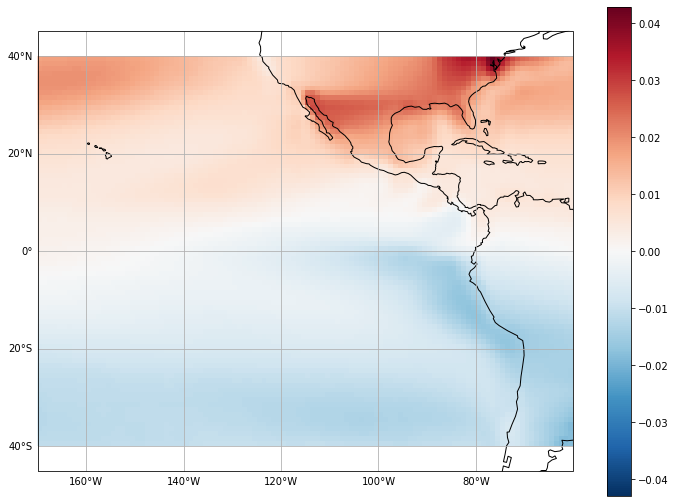

In [12]:
# Convert first eigenvector to data array
da_scaled_2d_v0 = xr.DataArray(V[:, 0], coords=[
    da_scaled_2d.coords['latlon']])

# Unstack latitudes and longitudes
da_v0 = da_scaled_2d_v0.unstack('latlon')

# Plot first eigenvector
fig = plt.figure(figsize=[12, 9])
ax = plt.subplot(projection=ccrs.PlateCarree())
p = da_v0.plot(ax=ax)
ax.set_extent([-170,-60,-30,30])
ax.coastlines()
gl=ax.gridlines(draw_labels=True)
gl.top_labels=False
gl.right_labels=False

> After that calculate the first principal component by the scalar product of the scaled sea surface temperature with the first eigenvector. Moreover, compare the variance of the first principal component to corresponding eigenvalues. These values are 23256.4 and 23305.5


In [13]:
# Compute first principal component
a0 = X @ V[:, 0]

# Compare variance of first principal component to corresponding eigenvalue
print(a0.var(), lam[0])
# Plot first principal component
#da_a0 = xr.DataArray(a0, coords=[da_scaled_2d.coords['time']])
#da_a0.plot()

23256.48947083401 23305.553794612155


> The power spectrum density (PSD) determines the power distribution of the first principal component. The PSD can be evaluated by applying the Fourier Transform of the entire signal. In our case, we used Welch's method where an estimate of the power spectral density by dividing the data into overlapping segments and then is averaging for each segment we have the periodograms.

> Using the welch command to calculate the frequency and power spectral density. Finally, the twelve months describe the physics of the variable.

Text(0.5, 1.0, 'Period of PSD maximum: 12.2 months')

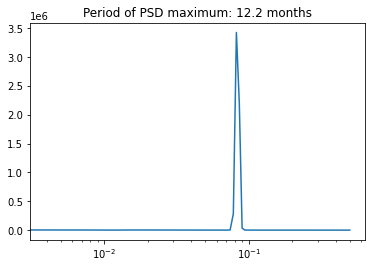

In [14]:
# Import signal module from Scipy
from scipy import signal

# Get PSD from Welch estimator
freqs, psd = signal.welch(a0)

# Plot and give period at maximum in title
plt.semilogx(freqs, psd)
plt.title('Period of PSD maximum: {:.1f} months'.format(1. / freqs[psd.argmax()]))

### 4.- MONTHLY ANALYSIS

> The twelve months describe the behavior of the sea surface temperature and then compute the monthly seasonal cycle in this period is distinguished by special climate conditions.

> After calculating monthly seasonal and then compute the mean of plotting the variance of seasonal cycle for twelve months for central Equatorial Pacific

C:\Users\User\anaconda3\lib\site-packages\xarray\plot\facetgrid.py:392: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self.fig.tight_layout()


<Figure size 432x288 with 0 Axes>

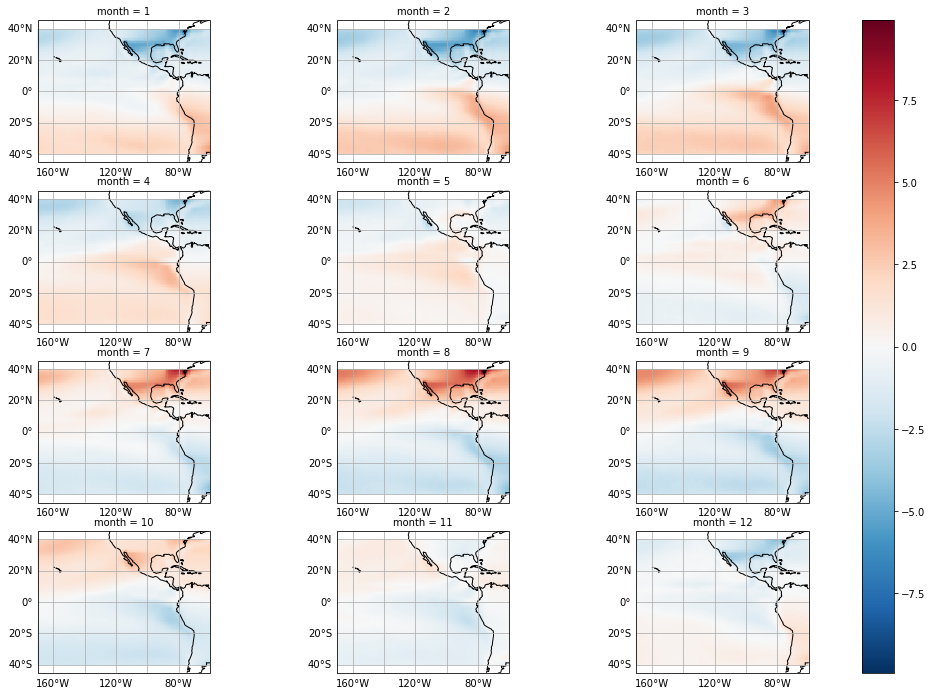

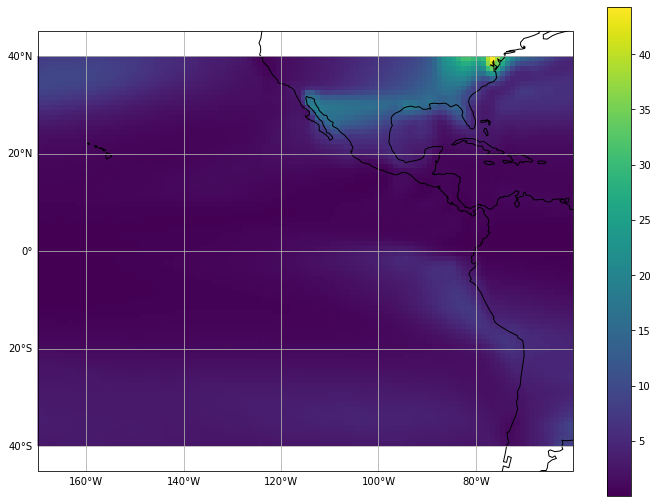

In [15]:
# Compute monthly seasonal cycle
gps = da_scaled.groupby('time.month')

# Get seasonal cycle
da_seasonal = gps.mean()

# Plot each month of seasonal cycle
fig = plt.figure()
col_wrap = 3
g = da_seasonal.plot(x='lon', y='lat', col='month', col_wrap=col_wrap,
                     subplot_kws=dict(projection=ccrs.PlateCarree()),
                     aspect=2)
for ax in g.axes.flat:
    ax.coastlines()
    ax.set_extent([-170,-60,-30,30])
    gl=ax.gridlines(draw_labels=True)
    gl.top_labels=False
    gl.right_labels=False
# Plot variance of seasonal cycle
fig = plt.figure(figsize=[12, 9])
ax = plt.subplot(projection=ccrs.PlateCarree())
p = da_seasonal.var('month').plot(ax=ax)
ax.set_extent([-170,-60,-30,30])
ax.coastlines()
gl=ax.gridlines(draw_labels=True)
gl.top_labels=False
gl.right_labels=False

> Sea surface temperature anomalies are simply transient events, not part of a specific pattern or trend. Other anomalies are more meaningful. At irregular intervals, the sea surface temperatures in the Pacific Ocean along the equator become warmer or cooler than normal. These anomalies are El Niño and La Niña climate cycles.

> After calculating the seasonal anomalies and then calculating the variance of the seasonal anomalies in the central Equatorial Pacific.

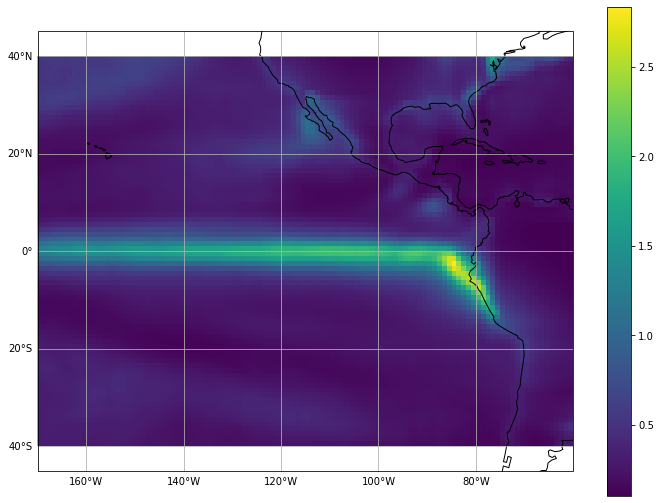

In [16]:
# Get seasonal anomalies
da_anom = da_scaled.groupby('time.month') - da_seasonal

# Plot variance of the seasonal anomalies on a map
fig = plt.figure(figsize=[12, 9])
ax = plt.subplot(projection=ccrs.PlateCarree())
p = da_anom.var('time').plot(ax=ax)
ax.set_extent([-170,-60,-30,30])
ax.coastlines()
gl=ax.gridlines(draw_labels=True)
gl.top_labels=False
gl.right_labels=False

> To calculate the seasonal anomalies of the sea surface temperature and then compute the la scaled area along latitude and longitude in order to get the input matrix for seasonal anomalies to calculate the covariance matrix.

> After calculating the covariance matrix using the NumPy command linalg.eigh to compute the eigenvalues and eigenvectors and sort them.

In [17]:
# Get input matrix for seasonal anomalies
da_anom_2d = da_anom.stack(latlon=['lat', 'lon'])
X_anom = da_anom_2d.values

# Estimate covariance matrix
Sigma_anom = np.cov(X_anom.T)
# Compute eigenvalues and eigenvectors
lam_anom, V_anom = np.linalg.eigh(Sigma_anom)

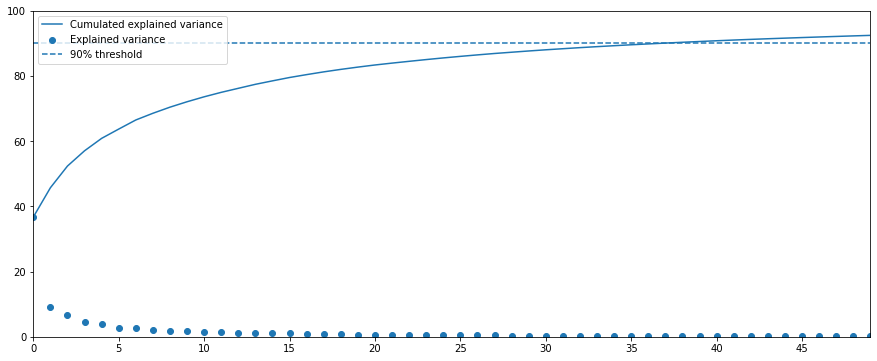

In [18]:
# Sort eigenvalues and eigenvectors by decreasing eigenvalues
isort = np.argsort(-lam_anom)
lam_anom = lam_anom[isort]
V_anom = V_anom[:, isort]

# Convert eigenvalues to explained variance percentage
expvar_anom = lam_anom / lam_anom.sum() * 100
cumexpvar_anom = expvar_anom.cumsum()

# Plot first 50 explained variances
n_eig = 50
xlim = [0., n_eig - 1]
x = np.arange(len(expvar_anom[:n_eig]))
plt.figure(figsize=[15, 6])
plt.scatter(x, expvar_anom[:n_eig], label='Explained variance')
plt.plot(x, cumexpvar_anom[:n_eig], label='Cumulated explained variance')
plt.hlines(90., *xlim, linestyle='--', label='90% threshold')
plt.xlim(xlim)
plt.ylim(0., 100.)
plt.xticks(range(0, n_eig, 5))
plt.legend()

In [19]:
import chart_studio.plotly as py
import plotly.graph_objects as go
import chart_studio
chart_studio.tools.set_credentials_file(username='ayuquemagaly', api_key='aYHNIYmJgnfqzJWjK3OZ') 

In [20]:
plot1 = go.Bar(x=x, y=expvar_anom[:n_eig], showlegend= False)
plot2 = go.Scatter(x=x, y=cumexpvar_anom[:n_eig], showlegend= False)

data = [plot1,plot2]

layout = go.Layout(xaxis= {"title": "Principal Component"},
                  yaxis ={"title": "Cumulated explained variance"},
                  title = "Percentage of variability explained by each principal component")

fig = go.Figure(data=data,layout=layout)
py.iplot(fig)
#fig.show()

> In the grahp below show  50 principal component describe the varianze of the 90% threshold 

C:\Users\User\anaconda3\lib\site-packages\xarray\plot\facetgrid.py:392: UserWarning:

Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations



<Figure size 432x288 with 0 Axes>

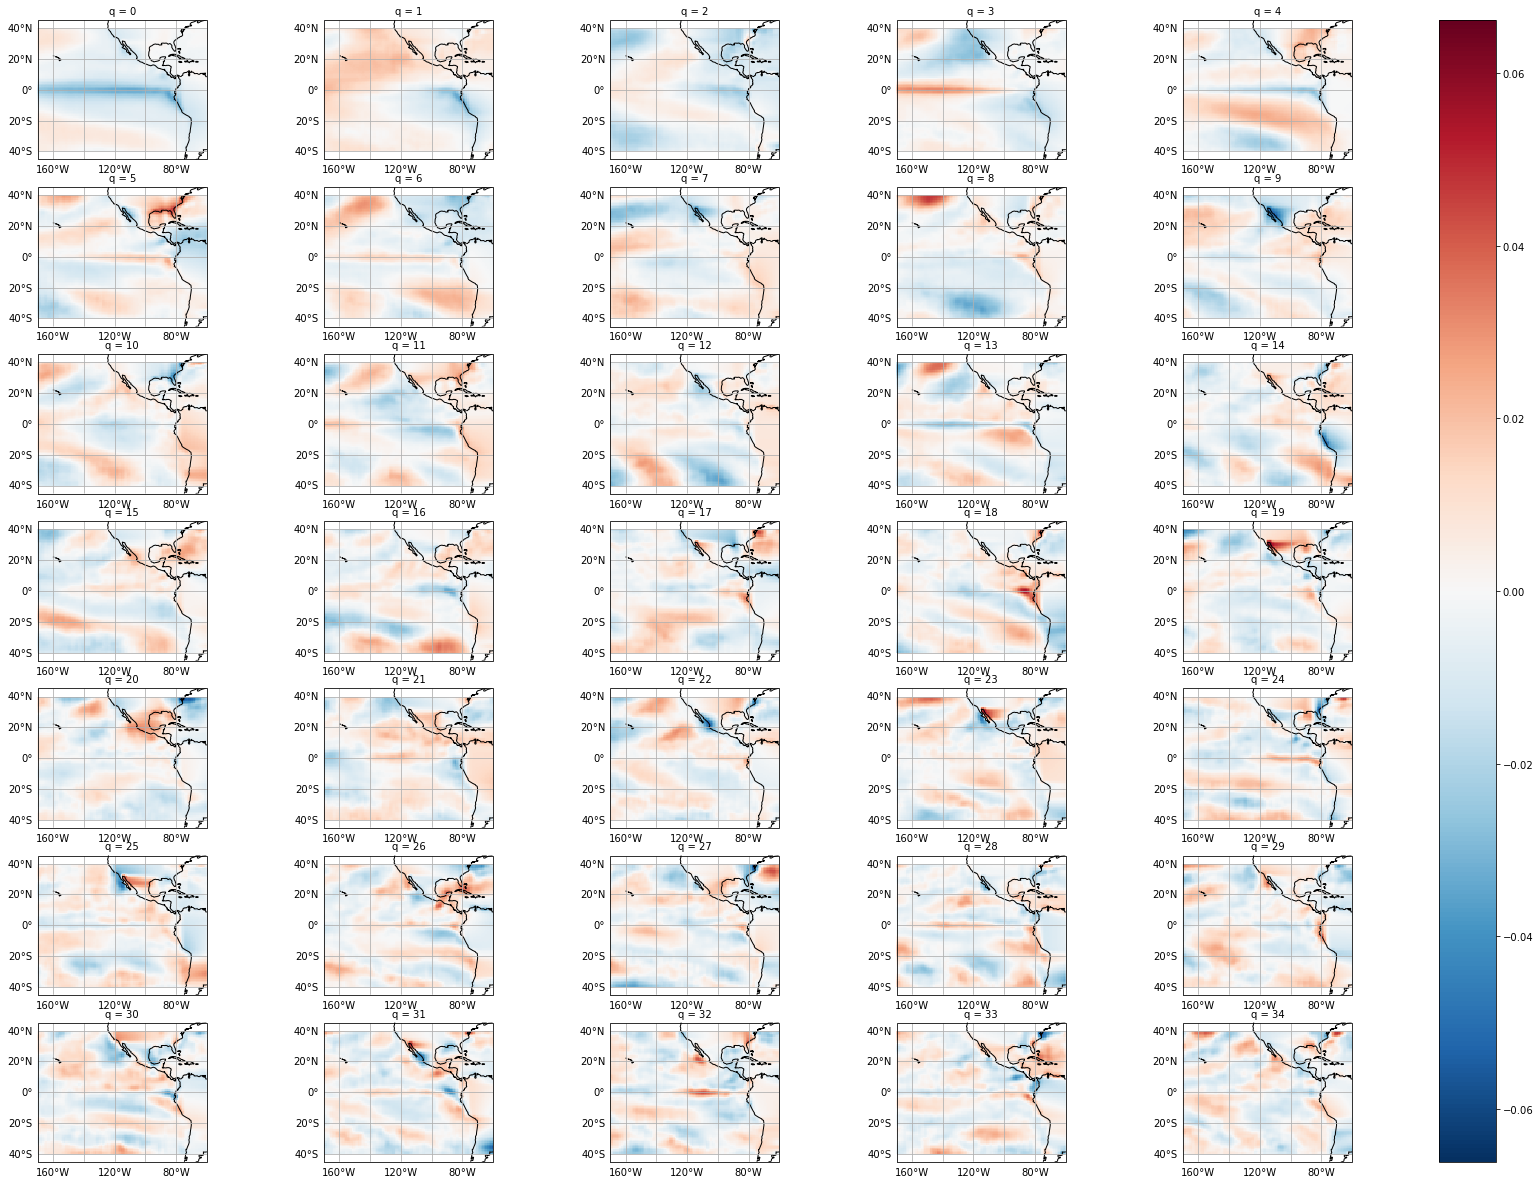

In [21]:
# Plot leading EOFs and principal components
n_eof = 35
coord_eof = 'q', range(n_eof)
da_v_anom = xr.DataArray(V_anom[:, :n_eof], coords=[
    da_anom_2d.coords['latlon'], coord_eof]).unstack('latlon')

plt.figure()
g = da_v_anom.plot(x='lon', y='lat', col='q', col_wrap=5, aspect=2,
                   subplot_kws=dict(projection=ccrs.PlateCarree()))
for ax in g.axes.flat:
    ax.coastlines()
    ax.set_extent([-170,-60,-30,30])
    gl=ax.gridlines(draw_labels=True)
    gl.top_labels=False
    gl.right_labels=False

#Compute the leading principal components
A_anom = X_anom @ V_anom[:, :n_eof]



In [22]:
# Plot the leading principal component
#plt.figure()
#da_a_anom = xr.DataArray(A_anom, coords=[da_scaled_2d.coords['time'], coord_eof])
#da_a_anom.plot.line(x='time', col='q', col_wrap=2, aspect=2)

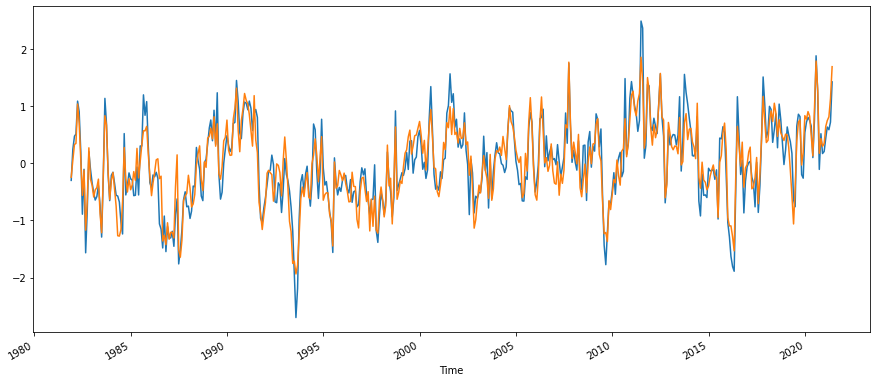

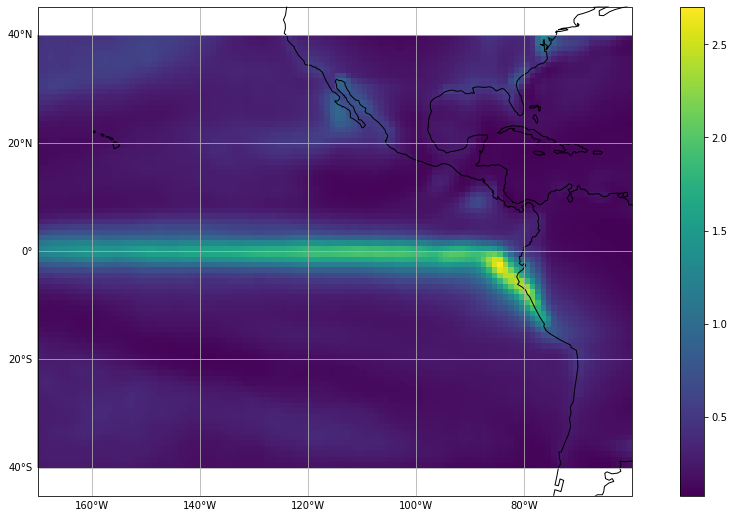

In [23]:
# Reconstruct the data from first 35 principal components
X_rec = A_anom @ V_anom[:, :n_eof].T

# Compare original time series and reconstruction at arbitrary grid points
ilatlon = 10
ts_anom = xr.DataArray(X_anom[:, ilatlon], coords=[da.coords['time']])
ts_rec = xr.DataArray(X_rec[:, ilatlon], coords=[da.coords['time']])
fig, ax = plt.subplots(figsize=[15, 6])
ts_anom.plot(ax=ax)
ts_rec.plot(ax=ax)

# Convert reconstruction to data array
da_rec_2d = xr.DataArray(X_rec, coords=[
    da.coords['time'], da_scaled_2d.coords['latlon']])

# Unstack latitudes and longitudes
da_rec = da_rec_2d.unstack('latlon')

# Plot variance of reconstruction on a map
fig = plt.figure(figsize=[17, 9])
ax = plt.subplot(projection=ccrs.PlateCarree())
p = da_rec.var('time').plot(ax=ax)
ax.set_extent([-170,-60,-30,30])
ax.coastlines()
gl=ax.gridlines(draw_labels=True)
gl.top_labels=False
gl.right_labels=False

### 4.- RECONSTRUCTION USING PRINCIPAL COMPONENT ANALYSIS


> The Niño 1+2 region is the smallest and eastern-most of the Niño SST regions, and corresponds with the region of coastal South America where El Niño was first recognized by the local populations.

> Niño 3 this region was once the primary focus for monitoring and predicting El Niño

> Niño 3.4 anomalies may be thought of as representing the average equatorial SSTs across the Pacific from about the dateline to the South American coast.El Niño or La  Niña events are defined when the  Niño 3.4 SSTs exceed +/- 0.4C for a period of six months or more.

> The  Niño 4 index captures SST anomalies in the central equatorial Pacific.  This region tends to have less variance than the other Niño regions.

<function matplotlib.pyplot.show(close=None, block=None)>

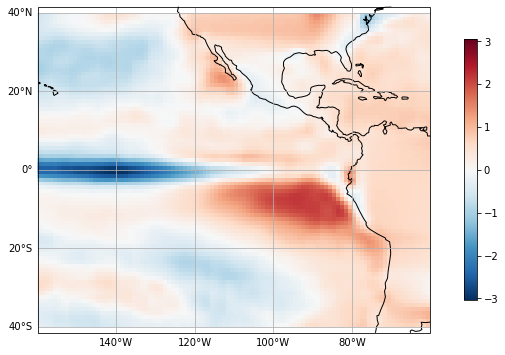

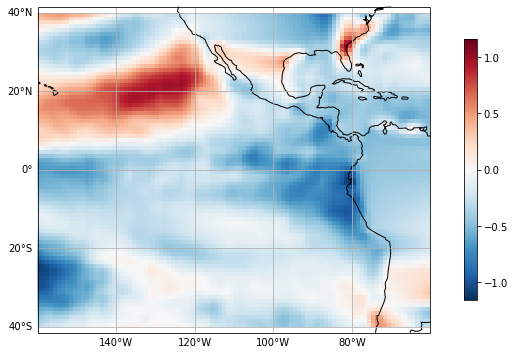

In [24]:
fig = plt.figure(figsize=[12, 6])
prc=da_rec[200,:,:]
ax1=plt.axes(projection=ccrs.PlateCarree())
ax1.set_extent([-160,-60,-30,30])
ax1.coastlines()
prc.plot(ax=ax1, transform=ccrs.PlateCarree(),cbar_kwargs={'shrink': 0.8},col_wrap=2)
plt.title('')
plt.show
gl=ax1.gridlines(draw_labels=True)
gl.top_labels=False
gl.right_labels=False


fig = plt.figure(figsize=[12, 6])
prc=da_rec[53,:,:]
ax1=plt.axes(projection=ccrs.PlateCarree())
ax1.set_extent([-160,-60,-30,30])
ax1.coastlines()
prc.plot(ax=ax1, transform=ccrs.PlateCarree(),cbar_kwargs={'shrink': 0.8},col_wrap=2)
gl=ax1.gridlines(draw_labels=True)
gl.top_labels=False
gl.right_labels=False
plt.title('')
plt.show

### 5.- CONCLUSION

> The first two PCs combined explain most of the variance (38% and 8%, respectively) in the domain. We decides to use the 35 principal component in order to reproduce the sesonal variability of sea surface temperature

> The weakness of this conventional method is that only  linear structures can be extracted from data. This limitation means that nonlinear structures are either missed or misinterpreted by this methods. However, ENSO has nonlinear features—for instance, the cold SST anomalies during La Niña are centred much further west than the warm anomalies during El Niño. This asymmetry can be explained by nonlinear physics.